<hr style="border:2px solid gray"> </hr>

<centre>
    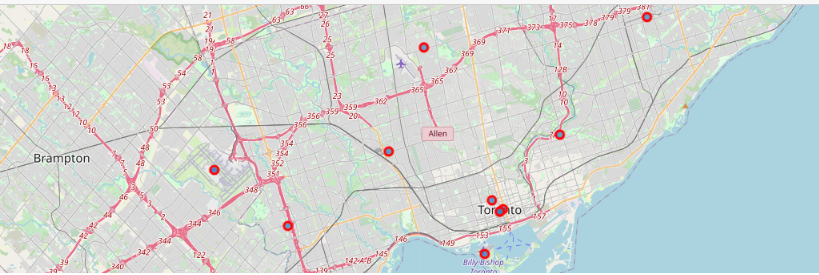
</centre>

<hr style="border:2px solid gray"> </hr>

# Segmentation for a Restaurant Location Planning

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem

This project is focused on running analysis on models of **borough in Toronto**, in order to select the most likely optimal location to start up a **restaurant business**. Each boorugh would be modelled with respect to four major criteria (for the sake of simplicity in this project);
- [Supply]
- [Demand]
- [Competition]
- [Land Area]

The purpose of this project is to show how this approach to market analysis is scalable in real case scenarios, and to also empahsise on the importance and ease of the process.

## Data

The data that will be used to model the neighbourhoods will be the count of venues in some select categories; restaurants, supermarkets, shopping malls, college & university, outdoors & recreation, hotels, professional complexes and inhabitants' residences. The count of these venues will then be grouped into three distinct categories which will serve as an insight into the nature of each neighbourhood to help our selection process.

The data extraction and preparation process will be divided into four phases
- [Web Scraping: Using bs4 to get necessary data from Wikipedia page on Toronto]
- [Getting the Coordinates for each Postal Code using Geocoder]
- [Getting borough land areas by manually measuring them using google maps.]
- [Using Foursquare API to model the boroughs.]

In [ ]:
!pip install folium

In [1]:
import requests # library to handle requests
from bs4 import BeautifulSoup
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # plotting library
from folium.features import DivIcon

import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### - Web Scraping: Using bs4 to get necessary data from Wikipedia page on Toronto

In [40]:
url = 'https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&direction=prev&oldid=926287641'
data  = requests.get(url).text
soup = BeautifulSoup(data,"html5lib")

In [41]:
table_contents=pd.DataFrame(columns=['PostalCode', 'Borough', 'Neighborhood'])
table=soup.find('table')
tabledata = table.findAll('td')
for row in range(len(tabledata)):
    cell = {}
    if len(tabledata[row].text) == 3:
        if tabledata[row].text in table_contents['PostalCode'].values:
            x = table_contents[table_contents['PostalCode'] == tabledata[row].text].index
            table_contents.iloc[x, 2] = table_contents.iloc[x, 2].values[0]+', '+tabledata[row+2].text
            
        else:
            if 'Not assigned' in tabledata[row+2].text:
                table_contents = table_contents.append({'PostalCode':tabledata[row].text, 'Borough':tabledata[row+1].text,
                                                       'Neighborhood':tabledata[row+1].text}, ignore_index=True)
            else:    
                table_contents = table_contents.append({'PostalCode':tabledata[row].text, 'Borough':tabledata[row+1].text,
                                                       'Neighborhood':tabledata[row+2].text}, ignore_index=True)
    else:
        pass
df=pd.DataFrame(table_contents)

In [42]:
df

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods\n
3,M4A,North York,Victoria Village\n
4,M5A,Downtown Toronto,"Harbourfront\n, Regent Park\n"
5,M6A,North York,"Lawrence Heights\n, Lawrence Manor\n"
6,M7A,Queen's Park,Queen's Park
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,Islington Avenue\n
9,M1B,Scarborough,"Rouge\n, Malvern\n"


### Data Wrangling

In [43]:
df = df.replace('\n', '', regex=True)
df = df.replace('Not assigned', np.nan, regex=True)
df

,PostalCode,Borough,Neighborhood
0,M1A,NaN,NaN
1,M2A,NaN,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Harbourfront, Regent Park"
5,M6A,North York,"Lawrence Heights, Lawrence Manor"
6,M7A,Queen's Park,Queen's Park
7,M8A,NaN,NaN
8,M9A,Etobicoke,Islington Avenue
9,M1B,Scarborough,"Rouge, Malvern"


In [44]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront, Regent Park"
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Queen's Park,Queen's Park


In [45]:
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [46]:
#df.head()
df.shape

(103, 3)

### - Getting the Coordinates for each Postal Code using Geocoder

In [2]:
geo = pd.read_csv('Geospatial_Coordinates.csv')
geo.columns = ['PostalCode', 'Latitude', 'Longitude']
geo.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


#### Merging data from different dataframes to get the required dataset.

In [48]:
df = df.merge(geo, on='PostalCode', how='left', indicator=True)

In [49]:
df.drop('_merge', axis=1, inplace=True)
df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937
9,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937


#### Getting the coordinates of the unique boroughs, so we could first analyse the boroughs, then the neighbourhoods.

In [50]:
boroughs = list(dict(df.Borough.value_counts()).keys())
boroughs

['North York',
 'Downtown Toronto',
 'Scarborough',
 'Etobicoke',
 'Central Toronto',
 'West Toronto',
 'York',
 'East York',
 'East Toronto',
 'Mississauga',
 "Queen's Park"]

In [51]:
borough_lat = []
borough_long = []
for borough in boroughs:
    address = borough + ', Toronto'
    geolocator = Nominatim(user_agent=borough)
    location = geolocator.geocode(address)
    borough_lat.append(location.latitude)
    borough_long.append(location.longitude)
borough_coord = pd.DataFrame({'Borough':boroughs, 'Borough Lat.':borough_lat, 'Borough Long.':borough_long}) 
borough_coord

,Borough,Borough Lat.,Borough Long.
0,North York,43.754326,-79.449117
1,Downtown Toronto,43.654174,-79.380812
2,Scarborough,43.772974,-79.257648
3,Etobicoke,43.643556,-79.565633
4,Central Toronto,43.652384,-79.383568
5,West Toronto,43.652384,-79.383568
6,York,43.689619,-79.479188
7,East York,43.699971,-79.332520
8,East Toronto,43.626243,-79.396962
9,Mississauga,43.678524,-79.629129


### - Getting borough land areas by manually measuring them using google maps.

#### Due to the significant difference in the boroughs' land mass, it was more realistic to run the individual foursquare search using their respective radii, instead of one general radius...

In [54]:
#These geospatial radii were measure using google maps, so as to have a more realistic depiction of the land masses covered by each borough.
borough_rad = {'North York':6558, 'Downtown Toronto':1609, 'Scarborough':6437, 'Etobicoke':6598, 'Central Toronto':1609, 'West Toronto':1609, 'East York':2293, 'East Toronto':1609, 'York':3017, "Queen's Park":1609, 'Mississauga':12271}
boroughrad = []

for item in list(borough_coord['Borough']):
    boroughrad.append(borough_rad[item])
borough_coord['Borough Rad.'] = boroughrad
borough_coord
#boroughrad

,Borough,Borough Lat.,Borough Long.,Borough Rad.
0,North York,43.754326,-79.449117,6558
1,Downtown Toronto,43.654174,-79.380812,1609
2,Scarborough,43.772974,-79.257648,6437
3,Etobicoke,43.643556,-79.565633,6598
4,Central Toronto,43.652384,-79.383568,1609
5,West Toronto,43.652384,-79.383568,1609
6,York,43.689619,-79.479188,3017
7,East York,43.699971,-79.332520,2293
8,East Toronto,43.626243,-79.396962,1609
9,Mississauga,43.678524,-79.629129,12271


In [55]:
df = pd.merge(df, borough_coord, how='left', left_on='Borough', right_on='Borough')
df

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Borough Lat.,Borough Long.,Borough Rad.
0,M3A,North York,Parkwoods,43.753259,-79.329656,43.754326,-79.449117,6558
1,M4A,North York,Victoria Village,43.725882,-79.315572,43.754326,-79.449117,6558
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,43.654174,-79.380812,1609
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,43.754326,-79.449117,6558
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494,43.659659,-79.390340,1609
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242,43.643556,-79.565633,6598
6,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,43.772974,-79.257648,6437
7,M3B,North York,Don Mills North,43.745906,-79.352188,43.754326,-79.449117,6558
8,M4B,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937,43.699971,-79.332520,2293
9,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,43.654174,-79.380812,1609


In [56]:
columns = list(df.columns[:2])+[df.columns[-3], df.columns[-2], df.columns[-1]]+list(df.columns[2:5])
df = df[columns]
df.head()

,PostalCode,Borough,Borough Lat.,Borough Long.,Borough Rad.,Neighborhood,Latitude,Longitude
0,M3A,North York,43.754326,-79.449117,6558,Parkwoods,43.753259,-79.329656
1,M4A,North York,43.754326,-79.449117,6558,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,43.654174,-79.380812,1609,"Harbourfront, Regent Park",43.654260,-79.360636
3,M6A,North York,43.754326,-79.449117,6558,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Queen's Park,43.659659,-79.390340,1609,Queen's Park,43.662301,-79.389494


In [57]:
df.groupby('Borough').count()

,PostalCode,Borough Lat.,Borough Long.,Borough Rad.,Neighborhood,Latitude,Longitude
Borough,,,,,,,
Central Toronto,9,9,9,9,9,9,9
Downtown Toronto,18,18,18,18,18,18,18
East Toronto,5,5,5,5,5,5,5
East York,5,5,5,5,5,5,5
Etobicoke,12,12,12,12,12,12,12
Mississauga,1,1,1,1,1,1,1
North York,24,24,24,24,24,24,24
Queen's Park,1,1,1,1,1,1,1
Scarborough,17,17,17,17,17,17,17


### - Using Foursquare API to model the boroughs.

In [58]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="Toronto")
location = geolocator.geocode(address)
latit = location.latitude
longit = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latit, longit))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [59]:
# create map of Manhattan using latitude and longitude values
map_toronto = folium.Map(location=[latit, longit], zoom_start=11)

# add markers to map
for lat, lng, borough in zip(borough_coord['Borough Lat.'], borough_coord['Borough Long.'], borough_coord['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)
    
print('Map of boroughs in Toronto')
map_toronto

In [60]:
#folium.map.Marker(
#    [lat, lng],
#    icon=DivIcon(
#        icon_size=(150,36),
#        icon_anchor=(0,0),
#        html='<div style="font-size: 10pt; font-family: Helvetica, sans-serif">Test</div>')
#    ).add_to(map_toronto)

In [ ]:
# @hidden_cell
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '' # Foursquare API version
LIMIT = 500

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [62]:
borough_coord

,Borough,Borough Lat.,Borough Long.,Borough Rad.
0,North York,43.754326,-79.449117,6558
1,Downtown Toronto,43.654174,-79.380812,1609
2,Scarborough,43.772974,-79.257648,6437
3,Etobicoke,43.643556,-79.565633,6598
4,Central Toronto,43.652384,-79.383568,1609
5,West Toronto,43.652384,-79.383568,1609
6,York,43.689619,-79.479188,3017
7,East York,43.699971,-79.332520,2293
8,East Toronto,43.626243,-79.396962,1609
9,Mississauga,43.678524,-79.629129,12271


#### The count of various categories of venues was gotten using Foursquare to give insight into the nature of market in each borough. Some venues give us insight into the level of demand and supply, others give insight into the level of expected competition in the market.

#### There are a lot more to consider in an actual scenario, but this is a mini-project to show the scalability in a real life scenario, so we'll only focus on these aspect of the market analysis.

In [63]:
considn = ['Supermarkets','Shopping Malls','College & University','Outdoors & Recreation','Hotels','Professional & Other Places','Residence','Food']
considn_dict = {'Supermarkets':[],'Shopping Malls':[],'College & University':[],'Outdoors & Recreation':[],'Hotels':[],'Professional & Other Places':[],'Residence':[],'Food':[]}
for lat, long, rad in zip(borough_coord['Borough Lat.'], borough_coord['Borough Long.'], borough_coord['Borough Rad.']):
    for con in considn:  
        query = con
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            long,
            query,
            rad, 
            LIMIT)
        results = requests.get(url).json()
        considn_dict[con].append(results['response']['totalResults'])

for considn in considn:
    borough_coord[considn] = considn_dict[considn]
borough_coord    

,Borough,Borough Lat.,Borough Long.,Borough Rad.,Supermarkets,Shopping Malls,College & University,Outdoors & Recreation,Hotels,Professional & Other Places,Residence,Food
0,North York,43.754326,-79.449117,6558,30,27,63,12,13,23,0,149
1,Downtown Toronto,43.654174,-79.380812,1609,16,14,99,41,86,34,6,167
2,Scarborough,43.772974,-79.257648,6437,36,34,51,2,10,7,0,227
3,Etobicoke,43.643556,-79.565633,6598,18,21,22,7,52,8,3,178
4,Central Toronto,43.652384,-79.383568,1609,17,15,86,51,87,38,7,188
5,West Toronto,43.652384,-79.383568,1609,17,15,86,51,87,38,7,188
6,York,43.689619,-79.479188,3017,6,4,3,3,2,3,0,105
7,East York,43.699971,-79.332520,2293,4,1,8,2,3,3,0,82
8,East Toronto,43.626243,-79.396962,1609,2,0,3,4,5,0,0,21
9,Mississauga,43.678524,-79.629129,12271,59,65,43,11,95,21,4,240


In [64]:
#Now we combine categories, so we can focus on three major categories (Supply, Demand, Competition)
borough_coord['Supply'] = (borough_coord['Supermarkets']+borough_coord['Shopping Malls'])/2
borough_coord['Demand'] = (borough_coord['College & University']+borough_coord['Outdoors & Recreation']
                           +borough_coord['Hotels']+borough_coord['Professional & Other Places']+borough_coord['Residence'])/5
borough_coord.drop(['Supermarkets','Shopping Malls','College & University','Outdoors & Recreation','Hotels','Professional & Other Places','Residence'], 1, inplace=True)
borough_coord.rename(columns = {"Food":"Competition"}, inplace=True)
borough_coord

,Borough,Borough Lat.,Borough Long.,Borough Rad.,Competition,Supply,Demand
0,North York,43.754326,-79.449117,6558,149,28.5,22.2
1,Downtown Toronto,43.654174,-79.380812,1609,167,15.0,53.2
2,Scarborough,43.772974,-79.257648,6437,227,35.0,14.0
3,Etobicoke,43.643556,-79.565633,6598,178,19.5,18.4
4,Central Toronto,43.652384,-79.383568,1609,188,16.0,53.8
5,West Toronto,43.652384,-79.383568,1609,188,16.0,53.8
6,York,43.689619,-79.479188,3017,105,5.0,2.2
7,East York,43.699971,-79.332520,2293,82,2.5,3.2
8,East Toronto,43.626243,-79.396962,1609,21,1.0,2.4
9,Mississauga,43.678524,-79.629129,12271,240,62.0,34.8


## Methodology

In this section of the project, an **unsupervised machine learning algorithm (k-means clustering)** will be applied on the selected features from the dataset in order to  find similarities between neighbourhood so as to narrow down the selection. Two clusters labels will be produced, the first will be the **supply and demand cluster**, as our target is to get neighbourhood with high or moderate demand and supply. The second cluster will be on **approx. borough land radius and level of competition** in the respective boroughs. Our focus in the second cluster is to find neighbouhoods with moderate land area and low or moderate competition.

The optimal boroughs with respect to each cluster will be selected, and the recurring boroughs in each selection will be shortlisted. The most likely optimal borough will then be picked from comparing the boroughs within the shortlisted boroughs.

After the optimal borough is picked, the same process is repeated on the neighbourhoods within the selected optimal borough, and the optimal neighbourhood is then picked ina similar manner.

## Analysis

In [65]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [66]:
#Our analysis will start with checking areas with high demand and supply
X = borough_coord[['Supply', 'Demand']]
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.5216946 , -0.28788718],
       [-0.29379643,  1.18171653],
       [ 0.91433844, -0.67662106],
       [-0.02196609, -0.46803215],
       [-0.23338969,  1.21016048],
       [-0.23338969,  1.21016048],
       [-0.89786387, -1.23601861],
       [-1.04888073, -1.18861203],
       [-1.13949084, -1.22653729],
       [ 2.54532051,  0.30943562],
       [-0.1125762 ,  1.17223522]])

In [67]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 14)
k_means.fit(Clus_dataSet)
labels = k_means.labels_
print(labels)

[0 1 0 2 1 1 2 2 2 0 1]


In [68]:
borough_coord['S&D Cluster'] = labels
borough_coord

,Borough,Borough Lat.,Borough Long.,Borough Rad.,Competition,Supply,Demand,S&D Cluster
0,North York,43.754326,-79.449117,6558,149,28.5,22.2,0
1,Downtown Toronto,43.654174,-79.380812,1609,167,15.0,53.2,1
2,Scarborough,43.772974,-79.257648,6437,227,35.0,14.0,0
3,Etobicoke,43.643556,-79.565633,6598,178,19.5,18.4,2
4,Central Toronto,43.652384,-79.383568,1609,188,16.0,53.8,1
5,West Toronto,43.652384,-79.383568,1609,188,16.0,53.8,1
6,York,43.689619,-79.479188,3017,105,5.0,2.2,2
7,East York,43.699971,-79.332520,2293,82,2.5,3.2,2
8,East Toronto,43.626243,-79.396962,1609,21,1.0,2.4,2
9,Mississauga,43.678524,-79.629129,12271,240,62.0,34.8,0


In [69]:
#Our next analysis will focus on area coverage and the competition in the business
Y = borough_coord[['Borough Rad.', 'Competition']]
Clus_dataSet1 = StandardScaler().fit_transform(Y)
Clus_dataSet1

array([[ 0.74101115, -0.15025277],
       [-0.75755514,  0.13858265],
       [ 0.70437213,  1.10136739],
       [ 0.75312322,  0.31509319],
       [-0.75755514,  0.47555731],
       [-0.75755514,  0.47555731],
       [-0.33121015, -0.85629491],
       [-0.55043868, -1.2253624 ],
       [-0.75755514, -2.20419355],
       [ 2.47091804,  1.30997075],
       [-0.75755514,  0.61997502]])

In [70]:
clusterNum = 3
k_means1 = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means1.fit(Clus_dataSet1)
labels1 = k_means1.labels_
print(labels1)

[1 2 1 1 2 2 0 0 0 1 2]


In [71]:
borough_coord['Area&Compt Cluster'] = labels1
borough_coord

,Borough,Borough Lat.,Borough Long.,Borough Rad.,Competition,Supply,Demand,S&D Cluster,Area&Compt Cluster
0,North York,43.754326,-79.449117,6558,149,28.5,22.2,0,1
1,Downtown Toronto,43.654174,-79.380812,1609,167,15.0,53.2,1,2
2,Scarborough,43.772974,-79.257648,6437,227,35.0,14.0,0,1
3,Etobicoke,43.643556,-79.565633,6598,178,19.5,18.4,2,1
4,Central Toronto,43.652384,-79.383568,1609,188,16.0,53.8,1,2
5,West Toronto,43.652384,-79.383568,1609,188,16.0,53.8,1,2
6,York,43.689619,-79.479188,3017,105,5.0,2.2,2,0
7,East York,43.699971,-79.332520,2293,82,2.5,3.2,2,0
8,East Toronto,43.626243,-79.396962,1609,21,1.0,2.4,2,0
9,Mississauga,43.678524,-79.629129,12271,240,62.0,34.8,0,1


### - Explanation

#### The concept behind this analysis is that, for someone looking to open a restaurant, you will want to open in an environment with high demand and supply of the products you need for operation, and you won't want somewhere with excessive competition

#### Another not so obvious observation is that, you could see a borough with adequated demand and supply, and relatively moderate competition but with a relatively very large area coverage, which will still impact negatively on the demand (as someone on one side of town might feel discouraged to drive all the way to another side of town, just to eat out). You could also see a borough with relatively moderate competition, and relatively very small area coverage, which would in turn am up the struggle for placement and relative competition.

#### So our focus here is to find a borough with moderate area coverage and competition, with adequate demand and supply.

In [74]:
#borough_coord.drop(['S&D Cluster','Area&Compt Cluster'], 1, inplace=True)
#borough_coord

In [75]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(labels))))
colors = ['yellow','green','blue']

In [103]:
SDmap_toronto = folium.Map(location=[latit, longit], zoom_start=11)

# add markers to map
for lat, lng, borough, label in zip(borough_coord['Borough Lat.'], borough_coord['Borough Long.'], borough_coord['Borough'], borough_coord['S&D Cluster']):
    if label == 2:
        label = '{}: High Ave.S&D'.format(borough)
        col = colors[0]
    elif label == 1:
        label = '{}: Moderate Ave.S&D'.format(borough)
        col = colors[1]
    else:
        label = '{}: Low Ave.S&D'.format(borough)
        col = colors[2]
            
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='red',
        fill=True,
        fill_color= col,
        fill_opacity=0.7,
        parse_html=False).add_to(SDmap_toronto)
    
print('Geospatial Map showing the different Supply and Demand Clusters')
print('')
print('Color: Blue')
print('Cluster: 0')
print('Characteristic: Low Average Supply and Demand')
print('')
print('Color: Green')
print('Cluster: 1')
print('Characteristic: Moderate Average Supply and Demand')
print('')
print('Color: Yellow')
print('Cluster: 2')
print('Characteristic: High Average Supply and Demand')
SDmap_toronto

Geospatial Map showing the different Supply and Demand Clusters


In [104]:
ACmap_toronto = folium.Map(location=[latit, longit], zoom_start=11)

# add markers to map
for lat, lng, borough, label in zip(borough_coord['Borough Lat.'], borough_coord['Borough Long.'], borough_coord['Borough'], borough_coord['Area&Compt Cluster']):
    if label == 2:
        label = '{}: Modrt.Comp.&LowCovg.'.format(borough)
        col = colors[0]
    elif label == 1:
        label = '{}: HighComp.&HighCovg.'.format(borough)
        col = colors[1]
    else:
        label = '{}: Low.Comp.&ModCovg.'.format(borough)
        col = colors[2]
            
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='red',
        fill=True,
        fill_color= col,
        fill_opacity=0.7,
        parse_html=False).add_to(ACmap_toronto)

print('Geospatial Map showing the different Area Coverage and Competition Level Clusters')
print('')
print('Color: Blue')
print('Cluster: 0')
print('Characteristic: Low Competition Level and Moderate Area Coverage')
print('')
print('Color: Yellow')
print('Cluster: 2')
print('Characteristic: Moderate Competition Level and Low Area Coverage')
print('')
print('Color: Green')
print('Cluster: 1')
print('Characteristic: High Competition Level and High Area Coverage')
ACmap_toronto

Geospatial Map showing the different Area Coverage and Competition Level Clusters


#### Let us select the optimal borough using the categories we've outline for consideration.

In [80]:
borough_coord['Avg. S&D'] = (borough_coord['Supply']+borough_coord['Demand'])/2

In [83]:
borough_coord.sort_values(['Competition'], ascending=True)

,Borough,Borough Lat.,Borough Long.,Borough Rad.,Competition,Supply,Demand,S&D Cluster,Area&Compt Cluster,Avg. S&D
8,East Toronto,43.626243,-79.396962,1609,21,1.0,2.4,2,0,1.70
7,East York,43.699971,-79.332520,2293,82,2.5,3.2,2,0,2.85
6,York,43.689619,-79.479188,3017,105,5.0,2.2,2,0,3.60
0,North York,43.754326,-79.449117,6558,149,28.5,22.2,0,1,25.35
1,Downtown Toronto,43.654174,-79.380812,1609,167,15.0,53.2,1,2,34.10
3,Etobicoke,43.643556,-79.565633,6598,178,19.5,18.4,2,1,18.95
4,Central Toronto,43.652384,-79.383568,1609,188,16.0,53.8,1,2,34.90
5,West Toronto,43.652384,-79.383568,1609,188,16.0,53.8,1,2,34.90
10,Queen's Park,43.659659,-79.390340,1609,197,18.0,53.0,1,2,35.50
2,Scarborough,43.772974,-79.257648,6437,227,35.0,14.0,0,1,24.50


In [84]:
borough_coord.sort_values(['Avg. S&D'], ascending=False)

,Borough,Borough Lat.,Borough Long.,Borough Rad.,Competition,Supply,Demand,S&D Cluster,Area&Compt Cluster,Avg. S&D
9,Mississauga,43.678524,-79.629129,12271,240,62.0,34.8,0,1,48.40
10,Queen's Park,43.659659,-79.390340,1609,197,18.0,53.0,1,2,35.50
4,Central Toronto,43.652384,-79.383568,1609,188,16.0,53.8,1,2,34.90
5,West Toronto,43.652384,-79.383568,1609,188,16.0,53.8,1,2,34.90
1,Downtown Toronto,43.654174,-79.380812,1609,167,15.0,53.2,1,2,34.10
0,North York,43.754326,-79.449117,6558,149,28.5,22.2,0,1,25.35
2,Scarborough,43.772974,-79.257648,6437,227,35.0,14.0,0,1,24.50
3,Etobicoke,43.643556,-79.565633,6598,178,19.5,18.4,2,1,18.95
6,York,43.689619,-79.479188,3017,105,5.0,2.2,2,0,3.60
7,East York,43.699971,-79.332520,2293,82,2.5,3.2,2,0,2.85


In [87]:
#Let's get the boroughs with the least competition
opt_loc = borough_coord.sort_values(['Competition'], ascending=True)
opt_loc = opt_loc.head(6)
opt_loc

,Borough,Borough Lat.,Borough Long.,Borough Rad.,Competition,Supply,Demand,S&D Cluster,Area&Compt Cluster,Avg. S&D
8,East Toronto,43.626243,-79.396962,1609,21,1.0,2.4,2,0,1.70
7,East York,43.699971,-79.332520,2293,82,2.5,3.2,2,0,2.85
6,York,43.689619,-79.479188,3017,105,5.0,2.2,2,0,3.60
0,North York,43.754326,-79.449117,6558,149,28.5,22.2,0,1,25.35
1,Downtown Toronto,43.654174,-79.380812,1609,167,15.0,53.2,1,2,34.10
3,Etobicoke,43.643556,-79.565633,6598,178,19.5,18.4,2,1,18.95


In [89]:
#Let's get the boroughs with the highest Supply and Demands
opt_loc1 = borough_coord.sort_values(['Avg. S&D'], ascending=False)
opt_loc1 = opt_loc1.head(6)
opt_loc1

,Borough,Borough Lat.,Borough Long.,Borough Rad.,Competition,Supply,Demand,S&D Cluster,Area&Compt Cluster,Avg. S&D
9,Mississauga,43.678524,-79.629129,12271,240,62.0,34.8,0,1,48.40
10,Queen's Park,43.659659,-79.390340,1609,197,18.0,53.0,1,2,35.50
4,Central Toronto,43.652384,-79.383568,1609,188,16.0,53.8,1,2,34.90
5,West Toronto,43.652384,-79.383568,1609,188,16.0,53.8,1,2,34.90
1,Downtown Toronto,43.654174,-79.380812,1609,167,15.0,53.2,1,2,34.10
0,North York,43.754326,-79.449117,6558,149,28.5,22.2,0,1,25.35


In [96]:
#let's get the recurring boroughs from these two optimal categories we've outlined.
opt_list = list(set(list(opt_loc['Borough'])) & set(list(opt_loc1['Borough'])))
opt_list

['North York', 'Downtown Toronto']

In [102]:
#Now that we have narrowed our consideration to two boroughs, let's compare their parameters
opt_bor = borough_coord.Borough.isin(opt_list)
opt_bor = borough_coord[opt_bor]
opt_bor

,Borough,Borough Lat.,Borough Long.,Borough Rad.,Competition,Supply,Demand,S&D Cluster,Area&Compt Cluster,Avg. S&D
0,North York,43.754326,-79.449117,6558,149,28.5,22.2,0,1,25.35
1,Downtown Toronto,43.654174,-79.380812,1609,167,15.0,53.2,1,2,34.10


#### From the table above, Downtown Toronto could have been considered but it has a higher competition value that North York, and an even much smaller area coverage which mean the competition would be amplified further. Hence our optimal choice is North York.

### - Further Clustering into the neighborhoods to get a more specific location.

#### Now that we have the optimal Borough (North York) from the list of boroughs in Toronto, let's take a step further and run the same analsysis in the various neighborhoods in North York.

#### Since we've already run this analysis before, we can eeasily copy and execute the same codes on the new coordinates.


In [105]:
df_1 = df[df['Borough'] == 'North York']
df_1

,PostalCode,Borough,Borough Lat.,Borough Long.,Borough Rad.,Neighborhood,Latitude,Longitude
0,M3A,North York,43.754326,-79.449117,6558,Parkwoods,43.753259,-79.329656
1,M4A,North York,43.754326,-79.449117,6558,Victoria Village,43.725882,-79.315572
3,M6A,North York,43.754326,-79.449117,6558,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
7,M3B,North York,43.754326,-79.449117,6558,Don Mills North,43.745906,-79.352188
10,M6B,North York,43.754326,-79.449117,6558,Glencairn,43.709577,-79.445073
13,M3C,North York,43.754326,-79.449117,6558,"Flemingdon Park, Don Mills South",43.725900,-79.340923
27,M2H,North York,43.754326,-79.449117,6558,Hillcrest Village,43.803762,-79.363452
28,M3H,North York,43.754326,-79.449117,6558,"Bathurst Manor, Downsview North, Wilson Heights",43.754328,-79.442259
33,M2J,North York,43.754326,-79.449117,6558,"Fairview, Henry Farm, Oriole",43.778517,-79.346556
34,M3J,North York,43.754326,-79.449117,6558,"Northwood Park, York University",43.767980,-79.487262


In [ ]:
latit = df_1['Borough Lat.'][0]
longit = df_1['Borough Long.'][0]

In [107]:
# create map of Manhattan using latitude and longitude values
map_NorthYork = folium.Map(location=[latit, longit], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df_1['Latitude'], df_1['Longitude'], df_1['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NorthYork)
    
print('Map of neighbourhoods in North York, Toronto')
map_NorthYork

In [ ]:
considn1 = ['Supermarkets','Shopping Malls','College & University','Outdoors & Recreation','Hotels','Professional & Other Places','Residence','Food']
considn_dict1 = {'Supermarkets':[],'Shopping Malls':[],'College & University':[],'Outdoors & Recreation':[],'Hotels':[],'Professional & Other Places':[],'Residence':[],'Food':[]}
rad = 965
for lat, long in zip(df_1['Latitude'], df_1['Longitude']):
    for con in considn1:  
        query = con
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            long,
            query,
            rad, 
            LIMIT)
        results = requests.get(url).json()
        considn_dict1[con].append(results['response']['totalResults'])



In [109]:
for considn in considn1:
    df_1[considn] = considn_dict1[considn]
df_1 

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,PostalCode,Borough,Borough Lat.,Borough Long.,Borough Rad.,Neighborhood,Latitude,Longitude,Supermarkets,Shopping Malls,College & University,Outdoors & Recreation,Hotels,Professional & Other Places,Residence,Food
0,M3A,North York,43.754326,-79.449117,6558,Parkwoods,43.753259,-79.329656,1,2,2,0,3,0,0,5
1,M4A,North York,43.754326,-79.449117,6558,Victoria Village,43.725882,-79.315572,0,0,1,0,1,0,0,4
3,M6A,North York,43.754326,-79.449117,6558,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,0,1,3,0,0,3,0,20
7,M3B,North York,43.754326,-79.449117,6558,Don Mills North,43.745906,-79.352188,1,0,6,0,1,0,0,19
10,M6B,North York,43.754326,-79.449117,6558,Glencairn,43.709577,-79.445073,2,2,3,0,0,0,0,17
13,M3C,North York,43.754326,-79.449117,6558,"Flemingdon Park, Don Mills South",43.725900,-79.340923,2,1,3,0,1,1,0,21
27,M2H,North York,43.754326,-79.449117,6558,Hillcrest Village,43.803762,-79.363452,1,1,4,1,0,0,0,7
28,M3H,North York,43.754326,-79.449117,6558,"Bathurst Manor, Downsview North, Wilson Heights",43.754328,-79.442259,1,1,1,0,1,0,0,11
33,M2J,North York,43.754326,-79.449117,6558,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,2,4,4,1,0,1,0,28
34,M3J,North York,43.754326,-79.449117,6558,"Northwood Park, York University",43.767980,-79.487262,1,0,1,0,0,0,0,16


In [110]:
df_1['Supply'] = (df_1['Supermarkets']+df_1['Shopping Malls'])/2
df_1['Demand'] = (df_1['College & University']+df_1['Outdoors & Recreation']
                           +df_1['Hotels']+df_1['Professional & Other Places']+df_1['Residence'])/5
df_1.drop(['Supermarkets','Shopping Malls','College & University','Outdoors & Recreation','Hotels','Professional & Other Places','Residence'], 1, inplace=True)
df_1.rename(columns = {"Food":"Competition"}, inplace=True)
df_1

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in

,PostalCode,Borough,Borough Lat.,Borough Long.,Borough Rad.,Neighborhood,Latitude,Longitude,Competition,Supply,Demand
0,M3A,North York,43.754326,-79.449117,6558,Parkwoods,43.753259,-79.329656,5,1.5,1.0
1,M4A,North York,43.754326,-79.449117,6558,Victoria Village,43.725882,-79.315572,4,0.0,0.4
3,M6A,North York,43.754326,-79.449117,6558,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,20,0.5,1.2
7,M3B,North York,43.754326,-79.449117,6558,Don Mills North,43.745906,-79.352188,19,0.5,1.4
10,M6B,North York,43.754326,-79.449117,6558,Glencairn,43.709577,-79.445073,17,2.0,0.6
13,M3C,North York,43.754326,-79.449117,6558,"Flemingdon Park, Don Mills South",43.725900,-79.340923,21,1.5,1.0
27,M2H,North York,43.754326,-79.449117,6558,Hillcrest Village,43.803762,-79.363452,7,1.0,1.0
28,M3H,North York,43.754326,-79.449117,6558,"Bathurst Manor, Downsview North, Wilson Heights",43.754328,-79.442259,11,1.0,0.4
33,M2J,North York,43.754326,-79.449117,6558,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,28,3.0,1.2
34,M3J,North York,43.754326,-79.449117,6558,"Northwood Park, York University",43.767980,-79.487262,16,0.5,0.2


In [111]:
#Our analysis will start with checking areas with high demand and supply
X = df_1[['Supply', 'Demand']]
Clus_dataSet2 = StandardScaler().fit_transform(X)
Clus_dataSet2

array([[ 0.43787685,  0.30151134],
       [-0.93286807, -0.60302269],
       [-0.4759531 ,  0.60302269],
       [-0.4759531 ,  0.90453403],
       [ 0.89479183, -0.30151134],
       [ 0.43787685,  0.30151134],
       [-0.01903812,  0.30151134],
       [-0.01903812, -0.60302269],
       [ 1.80862177,  0.60302269],
       [-0.4759531 , -0.90453403],
       [-0.01903812, -1.20604538],
       [-0.93286807, -0.30151134],
       [-0.93286807, -0.60302269],
       [-0.01903812, -0.30151134],
       [-0.93286807, -1.20604538],
       [ 0.43787685, -0.90453403],
       [ 0.89479183,  0.60302269],
       [-0.93286807, -0.30151134],
       [-0.93286807, -0.30151134],
       [-0.93286807, -1.20604538],
       [ 2.72245172,  3.31662479],
       [ 1.80862177,  1.20604538],
       [-0.93286807,  1.20604538],
       [-0.4759531 , -0.60302269]])

In [112]:
clusterNum = 3
k_means2 = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 14)
k_means2.fit(Clus_dataSet2)
labels2 = k_means2.labels_
print(labels2)

[2 1 2 2 2 2 2 1 0 1 1 1 1 1 1 1 2 1 1 1 0 0 2 1]


In [114]:
df_1['S&D Cluster'] = labels2
df_1

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,PostalCode,Borough,Borough Lat.,Borough Long.,Borough Rad.,Neighborhood,Latitude,Longitude,Competition,Supply,Demand,S&D Cluster
0,M3A,North York,43.754326,-79.449117,6558,Parkwoods,43.753259,-79.329656,5,1.5,1.0,2
1,M4A,North York,43.754326,-79.449117,6558,Victoria Village,43.725882,-79.315572,4,0.0,0.4,1
3,M6A,North York,43.754326,-79.449117,6558,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,20,0.5,1.2,2
7,M3B,North York,43.754326,-79.449117,6558,Don Mills North,43.745906,-79.352188,19,0.5,1.4,2
10,M6B,North York,43.754326,-79.449117,6558,Glencairn,43.709577,-79.445073,17,2.0,0.6,2
13,M3C,North York,43.754326,-79.449117,6558,"Flemingdon Park, Don Mills South",43.725900,-79.340923,21,1.5,1.0,2
27,M2H,North York,43.754326,-79.449117,6558,Hillcrest Village,43.803762,-79.363452,7,1.0,1.0,2
28,M3H,North York,43.754326,-79.449117,6558,"Bathurst Manor, Downsview North, Wilson Heights",43.754328,-79.442259,11,1.0,0.4,1
33,M2J,North York,43.754326,-79.449117,6558,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,28,3.0,1.2,0
34,M3J,North York,43.754326,-79.449117,6558,"Northwood Park, York University",43.767980,-79.487262,16,0.5,0.2,1


In [117]:
Y = df_1[['Borough Rad.', 'Competition']]
Clus_dataSet3 = StandardScaler().fit_transform(Y)
Clus_dataSet3

array([[ 0.        , -0.51245716],
       [ 0.        , -0.56687739],
       [ 0.        ,  0.30384628],
       [ 0.        ,  0.24942605],
       [ 0.        ,  0.14058559],
       [ 0.        ,  0.35826651],
       [ 0.        , -0.4036167 ],
       [ 0.        , -0.18593578],
       [ 0.        ,  0.73920812],
       [ 0.        ,  0.08616536],
       [ 0.        , -0.51245716],
       [ 0.        , -0.18593578],
       [ 0.        , -0.67571785],
       [ 0.        , -0.56687739],
       [ 0.        , -0.67571785],
       [ 0.        , -0.56687739],
       [ 0.        ,  0.41268674],
       [ 0.        , -0.51245716],
       [ 0.        ,  0.57594743],
       [ 0.        , -0.51245716],
       [ 0.        ,  4.33094328],
       [ 0.        , -0.13151556],
       [ 0.        , -0.56687739],
       [ 0.        , -0.62129762]])

In [118]:
clusterNum = 3
k_means3 = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 14)
k_means3.fit(Clus_dataSet3)
labels3 = k_means3.labels_
print(labels3)

[1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 2 1 1 1]


In [119]:
df_1['Area&Compt Cluster'] = labels3
df_1

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,PostalCode,Borough,Borough Lat.,Borough Long.,Borough Rad.,Neighborhood,Latitude,Longitude,Competition,Supply,Demand,S&D Cluster,Area&Compt Cluster
0,M3A,North York,43.754326,-79.449117,6558,Parkwoods,43.753259,-79.329656,5,1.5,1.0,2,1
1,M4A,North York,43.754326,-79.449117,6558,Victoria Village,43.725882,-79.315572,4,0.0,0.4,1,1
3,M6A,North York,43.754326,-79.449117,6558,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,20,0.5,1.2,2,0
7,M3B,North York,43.754326,-79.449117,6558,Don Mills North,43.745906,-79.352188,19,0.5,1.4,2,0
10,M6B,North York,43.754326,-79.449117,6558,Glencairn,43.709577,-79.445073,17,2.0,0.6,2,0
13,M3C,North York,43.754326,-79.449117,6558,"Flemingdon Park, Don Mills South",43.725900,-79.340923,21,1.5,1.0,2,0
27,M2H,North York,43.754326,-79.449117,6558,Hillcrest Village,43.803762,-79.363452,7,1.0,1.0,2,1
28,M3H,North York,43.754326,-79.449117,6558,"Bathurst Manor, Downsview North, Wilson Heights",43.754328,-79.442259,11,1.0,0.4,1,1
33,M2J,North York,43.754326,-79.449117,6558,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,28,3.0,1.2,0,0
34,M3J,North York,43.754326,-79.449117,6558,"Northwood Park, York University",43.767980,-79.487262,16,0.5,0.2,1,0


In [122]:
colors = ['yellow','green','blue']
SDmap_NorhtYork = folium.Map(location=[latit, longit], zoom_start=11)

# add markers to map
for lat, lng, borough, label in zip(df_1['Latitude'], df_1['Longitude'], df_1['Neighborhood'], df_1['S&D Cluster']):
    if label == 0:
        label = '{}: High Ave.S&D'.format(borough)
        col = colors[0]
    elif label == 2:
        label = '{}: Moderate Ave.S&D'.format(borough)
        col = colors[1]
    else:
        label = '{}: Low Ave.S&D'.format(borough)
        col = colors[2]
            
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='red',
        fill=True,
        fill_color= col,
        fill_opacity=0.7,
        parse_html=False).add_to(SDmap_NorhtYork)
    
print('Geospatial Map showing the different Supply and Demand Clusters')
print('')
print('Color: Blue')
print('Cluster: 1')
print('Characteristic: Low Average Supply and Demand')
print('')
print('Color: Green')
print('Cluster: 2')
print('Characteristic: Moderate Average Supply and Demand')
print('')
print('Color: Yellow')
print('Cluster: 0')
print('Characteristic: High Average Supply and Demand')
SDmap_NorhtYork

Geospatial Map showing the different Supply and Demand Clusters


In [139]:
colors = ['yellow','green','blue']
ACmap_NorhtYork = folium.Map(location=[latit, longit], zoom_start=11)

# add markers to map
for lat, lng, borough, label in zip(df_1['Latitude'], df_1['Longitude'], df_1['Neighborhood'], df_1['Area&Compt Cluster']):
    if label == 2:
        label = '{}: High Competition'.format(borough)
        col = colors[0]
    elif label == 0:
        label = '{}: Moderate Competition'.format(borough)
        col = colors[1]
    else:
        label = '{}: Low Competition'.format(borough)
        col = colors[2]
            
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='red',
        fill=True,
        fill_color= col,
        fill_opacity=0.7,
        parse_html=False).add_to(ACmap_NorhtYork)
    
print('Geospatial Map showing the different Competition Level Clusters')
print('')
print('Color: Blue')
print('Cluster: 1')
print('Characteristic: Low Competition Level')
print('')
print('Color: Green')
print('Cluster: 0')
print('Characteristic: Moderate Competition Level')
print('')
print('Color: Yellow')
print('Cluster: 2')
print('Characteristic: High Competition Level')
ACmap_NorhtYork

Geospatial Map showing the different Competition Level Clusters


In [120]:
df_1.sort_values(['S&D Cluster'], ascending=False)

,PostalCode,Borough,Borough Lat.,Borough Long.,Borough Rad.,Neighborhood,Latitude,Longitude,Competition,Supply,Demand,S&D Cluster,Area&Compt Cluster
0,M3A,North York,43.754326,-79.449117,6558,Parkwoods,43.753259,-79.329656,5,1.5,1.0,2,1
3,M6A,North York,43.754326,-79.449117,6558,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,20,0.5,1.2,2,0
7,M3B,North York,43.754326,-79.449117,6558,Don Mills North,43.745906,-79.352188,19,0.5,1.4,2,0
10,M6B,North York,43.754326,-79.449117,6558,Glencairn,43.709577,-79.445073,17,2.0,0.6,2,0
13,M3C,North York,43.754326,-79.449117,6558,"Flemingdon Park, Don Mills South",43.725900,-79.340923,21,1.5,1.0,2,0
27,M2H,North York,43.754326,-79.449117,6558,Hillcrest Village,43.803762,-79.363452,7,1.0,1.0,2,1
66,M2P,North York,43.754326,-79.449117,6558,York Mills West,43.752758,-79.400049,4,0.0,1.6,2,1
52,M2M,North York,43.754326,-79.449117,6558,"Newtonbrook, Willowdale",43.789053,-79.408493,22,2.0,1.2,2,0
49,M6L,North York,43.754326,-79.449117,6558,"Downsview, North Park, Upwood Park",43.713756,-79.490074,2,0.0,0.0,1,1
57,M9M,North York,43.754326,-79.449117,6558,"Emery, Humberlea",43.724766,-79.532242,5,0.0,0.0,1,1


In [123]:
df_1.sort_values(['Area&Compt Cluster'], ascending=False)

,PostalCode,Borough,Borough Lat.,Borough Long.,Borough Rad.,Neighborhood,Latitude,Longitude,Competition,Supply,Demand,S&D Cluster,Area&Compt Cluster
59,M2N,North York,43.754326,-79.449117,6558,Willowdale South,43.770120,-79.408493,94,4.0,3.0,0,2
0,M3A,North York,43.754326,-79.449117,6558,Parkwoods,43.753259,-79.329656,5,1.5,1.0,2,1
40,M3K,North York,43.754326,-79.449117,6558,"CFB Toronto, Downsview East",43.737473,-79.464763,11,0.0,0.6,1,1
66,M2P,North York,43.754326,-79.449117,6558,York Mills West,43.752758,-79.400049,4,0.0,1.6,2,1
60,M3N,North York,43.754326,-79.449117,6558,Downsview Northwest,43.761631,-79.520999,12,3.0,1.6,0,1
57,M9M,North York,43.754326,-79.449117,6558,"Emery, Humberlea",43.724766,-79.532242,5,0.0,0.0,1,1
53,M3M,North York,43.754326,-79.449117,6558,Downsview Central,43.728496,-79.495697,5,0.0,0.6,1,1
50,M9L,North York,43.754326,-79.449117,6558,Humber Summit,43.756303,-79.565963,4,1.5,0.2,1,1
49,M6L,North York,43.754326,-79.449117,6558,"Downsview, North Park, Upwood Park",43.713756,-79.490074,2,0.0,0.0,1,1
46,M3L,North York,43.754326,-79.449117,6558,Downsview West,43.739015,-79.506944,4,1.0,0.6,1,1


In [132]:
#Let us first eliminat areas of low demand and supply
opt_neigh = df_1['S&D Cluster'].isin([0,2])
opt_neigh = df_1[opt_neigh]
opt_neigh

,PostalCode,Borough,Borough Lat.,Borough Long.,Borough Rad.,Neighborhood,Latitude,Longitude,Competition,Supply,Demand,S&D Cluster,Area&Compt Cluster
0,M3A,North York,43.754326,-79.449117,6558,Parkwoods,43.753259,-79.329656,5,1.5,1.0,2,1
3,M6A,North York,43.754326,-79.449117,6558,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,20,0.5,1.2,2,0
7,M3B,North York,43.754326,-79.449117,6558,Don Mills North,43.745906,-79.352188,19,0.5,1.4,2,0
10,M6B,North York,43.754326,-79.449117,6558,Glencairn,43.709577,-79.445073,17,2.0,0.6,2,0
13,M3C,North York,43.754326,-79.449117,6558,"Flemingdon Park, Don Mills South",43.725900,-79.340923,21,1.5,1.0,2,0
27,M2H,North York,43.754326,-79.449117,6558,Hillcrest Village,43.803762,-79.363452,7,1.0,1.0,2,1
33,M2J,North York,43.754326,-79.449117,6558,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,28,3.0,1.2,0,0
52,M2M,North York,43.754326,-79.449117,6558,"Newtonbrook, Willowdale",43.789053,-79.408493,22,2.0,1.2,2,0
59,M2N,North York,43.754326,-79.449117,6558,Willowdale South,43.770120,-79.408493,94,4.0,3.0,0,2
60,M3N,North York,43.754326,-79.449117,6558,Downsview Northwest,43.761631,-79.520999,12,3.0,1.6,0,1


In [133]:
#Next we'll eliminate the area of high competition
opt_neigh = opt_neigh[opt_neigh['Competition']<20]
opt_neigh

,PostalCode,Borough,Borough Lat.,Borough Long.,Borough Rad.,Neighborhood,Latitude,Longitude,Competition,Supply,Demand,S&D Cluster,Area&Compt Cluster
0,M3A,North York,43.754326,-79.449117,6558,Parkwoods,43.753259,-79.329656,5,1.5,1.0,2,1
7,M3B,North York,43.754326,-79.449117,6558,Don Mills North,43.745906,-79.352188,19,0.5,1.4,2,0
10,M6B,North York,43.754326,-79.449117,6558,Glencairn,43.709577,-79.445073,17,2.0,0.6,2,0
27,M2H,North York,43.754326,-79.449117,6558,Hillcrest Village,43.803762,-79.363452,7,1.0,1.0,2,1
60,M3N,North York,43.754326,-79.449117,6558,Downsview Northwest,43.761631,-79.520999,12,3.0,1.6,0,1
66,M2P,North York,43.754326,-79.449117,6558,York Mills West,43.752758,-79.400049,4,0.0,1.6,2,1


In [134]:
# Since we know that the S&D Cluster with label 0 have the highest supply and demand, and the Competiton Clusters with label 1 have the least competition,
# Let us see if there are any neighbourhood that fits both categories

opt_neigh = opt_neigh[(opt_neigh['S&D Cluster'] == 0) & (opt_neigh['Area&Compt Cluster'] == 1)]
opt_neigh

,PostalCode,Borough,Borough Lat.,Borough Long.,Borough Rad.,Neighborhood,Latitude,Longitude,Competition,Supply,Demand,S&D Cluster,Area&Compt Cluster
60,M3N,North York,43.754326,-79.449117,6558,Downsview Northwest,43.761631,-79.520999,12,3.0,1.6,0,1


## Result and Discussion

- [Result]

After the first selection process for boroughs, there were only two remaining boroughs; North York and Downtown Toronto. Downtown Toronto had considerably higher supply and demand, but the competition was significantly higher due to its small land area in comparison to North York. Downtown Toronto had higher competition in a much smaller land area which meant more restaurants in a tighter cluster competing for its hgiher demand and supply, so North York was the natural pick.

The same selection process was carried out on the neighbourhoods of North York. Due to the small marginal difference in the area of each neighbourhood, all neighborhoods were assumed the same size, hence land area was not considered in this part of the analysis. In a similar manner, when the neighbourhoods were narrowed down to highest supply and demand, and lowest competiton, Downsview Northwest was the optimal choice as it had the highest supply and demand, with a moderately low competition level.

From this selection process, it is clear that the neighbourhood with the best supply and demand, while having moderate competition is Downsview Northwest, North York, Toronto.

- [Further Discussion]

There are a lot more factors that can be considered when opening a business in a real case scenario, and these factor can also be considered in further studies. Factors like the age distribution of the inhabiting population also serves a significant purpose. Even though knowing the kind of recreation centres and professional complexes in the areas gives a bit of an insight to age distribution, having the actual values goes a longer way. Some age grades are more receptive of the idea of eating out than others. Other factors like safety index are also beneficial to a business owner, as this can help you decide on business hours withouth fear of harm to workers or damage to properties. All these are factors that can be considered in a further study.

The analysis done in this project was a top-down approach. The borough were first narrowed down before focusing on a select number of neighbourhoods, and this left out the neighbourhoods of every other borough, even though there's a small chance some neighbourhood in other boroughs could fit our target better than that which we've selected. Hence, in a further study, one could follow a bottom-up approach, and bear in mind that this approach could get considerably more time consuming and complicated with a significant increase in data.

It can also be noticed that some boroughs are significantly closer to each other than other borough, so despite these boroughs not meeting up the expectation separately, these neighbourhoods could meet up when combined, which is also another area that can be covered in further studies.

In [138]:
# create map of Manhattan using latitude and longitude values
map_NorthYork = folium.Map(location=[latit, longit], zoom_start=11)

# add markers to map
for lat, lng, neighborhood, postal, borough in zip(opt_neigh['Latitude'], opt_neigh['Longitude'], opt_neigh['Neighborhood'], opt_neigh['PostalCode'], opt_neigh['Borough']):
    label = '{}, {}: {}'.format(neighborhood, postal, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NorthYork)

for lat, lng, borough, postal in zip(opt_neigh['Borough Lat.'], opt_neigh['Borough Long.'], opt_neigh['Borough'], opt_neigh['PostalCode']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='red',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NorthYork)    
    
print('Map showing the optimal location: Downsview Northwest, North York, Toronto')
map_NorthYork

## Conclusion:

The purpose of this project was help a hypothetical stakeholder select an optimal location in Toronto to open a restaurant business. This was done by gathering data on the existing boroughs and neighbourhoods in each borough and using the said data to model the different locations. The various locations were then clustered and the optimal neighbourhood in the optimal borough was selected. From all the outlined neighbourhoods in all the boroughs in Toronto, Canada, after carrying out a two level selection process that involves the use of k-means clustering in picking out the optimal borough, and then selecting the optimal neighborhood in that borough, it was found that 'Downsview Northwest, North York, Toronto, Canada' was the most likely optimal neighborhood to open a restaurant.

In a similar manner, this same process could be carried out by a variety of other businesses for a variety of other pruposes besides opening a new business spot or expanding. This is the overall aim of this project.